In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the data

In [ ]:
data = pd.read_csv('NVIDIA_STOCK.csv')
print('Data Shape:', data.shape)
print(data.head())

Data Shape: (1699, 7)
        Price           Adj Close  ...               Open     Volume
0      Ticker                NVDA  ...               NVDA       NVDA
1        Date                 NaN  ...                NaN        NaN
2  2018-01-02   4.929879665374756  ...  4.894499778747559  355616000
3  2018-01-03   5.254334926605225  ...  5.102499961853027  914704000
4  2018-01-04  5.2820329666137695  ...  5.394000053405762  583268000

[5 rows x 7 columns]


In [ ]:
print(data.describe())

             Price          Adj Close  ...               Open     Volume
count         1699               1698  ...               1698       1698
unique        1699               1686  ...               1663       1696
top     2024-09-30  4.585628509521484  ...  5.949999809265137  656912000
freq             1                  2  ...                  3          2

[4 rows x 7 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB
None


# Step 2: Data Preprocessing


In [ ]:
#print(data.head)
# Drop the first two rows by position
data = data.drop(index=data.index[:2])
#print(data.head)

<bound method NDFrame.head of            Price           Adj Close  ...                Open     Volume
0         Ticker                NVDA  ...                NVDA       NVDA
1           Date                 NaN  ...                 NaN        NaN
2     2018-01-02   4.929879665374756  ...   4.894499778747559  355616000
3     2018-01-03   5.254334926605225  ...   5.102499961853027  914704000
4     2018-01-04  5.2820329666137695  ...   5.394000053405762  583268000
...          ...                 ...  ...                 ...        ...
1694  2024-09-24   120.8616714477539  ...   116.5199966430664  354966800
1695  2024-09-25  123.50149536132812  ...   122.0199966430664  284692900
1696  2024-09-26  124.03145599365234  ...  126.80000305175781  302582900
1697  2024-09-27  121.39163970947266  ...  123.97000122070312  271009200
1698  2024-09-30  121.43163299560547  ...  118.30999755859375  226553700

[1699 rows x 7 columns]>
<bound method NDFrame.head of            Price           Adj Close  

In [ ]:
#rename the first column which reprensents the date
data = data.rename(columns={'Price': 'Date'})
print(data.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Set the date as the index
data.set_index('Date', inplace=True)

In [ ]:
# Check for duplicate rows and count how many duplicates exist
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values
print('Missing Values:', data.isnull().sum())

Missing Values: Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [87]:
# Convert the 'Close' column to numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Step 3: Exploratory Data Analysis

## Closing Price Time Series

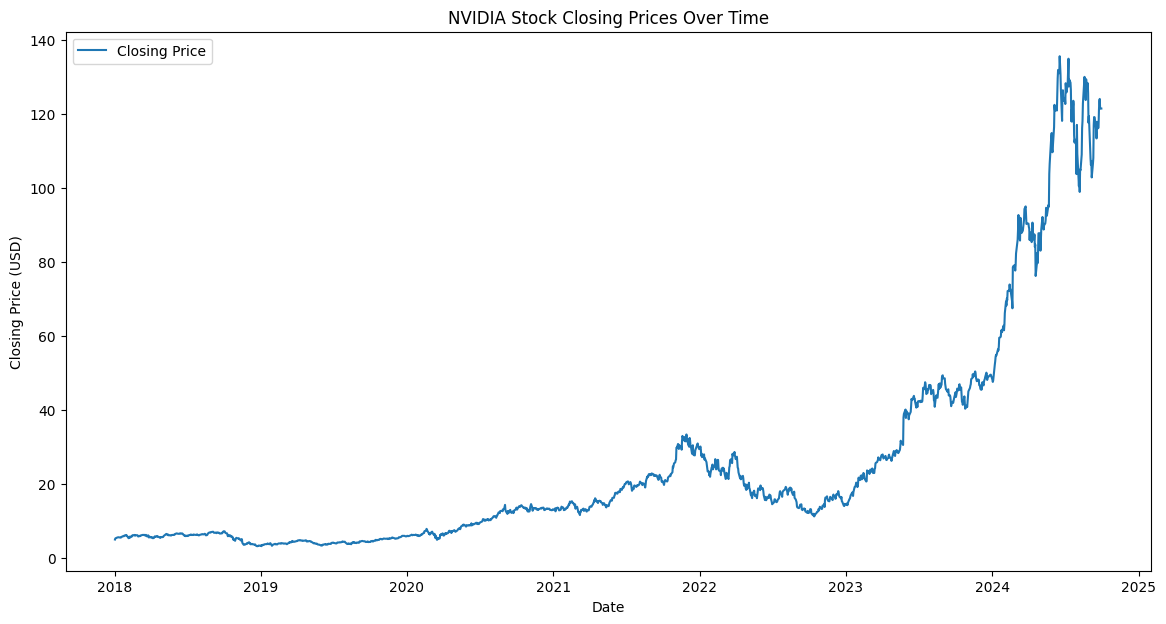

In [81]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title('NVIDIA Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


## Trading Volume Time Series

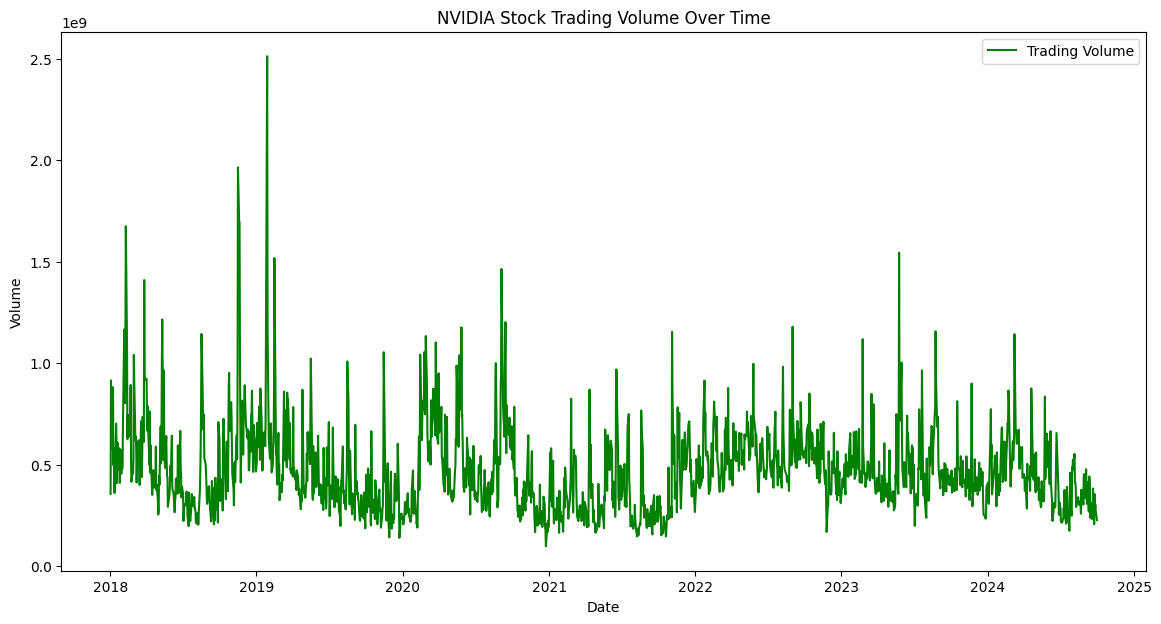

In [82]:
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Trading Volume', color='green')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

## Moving Averages

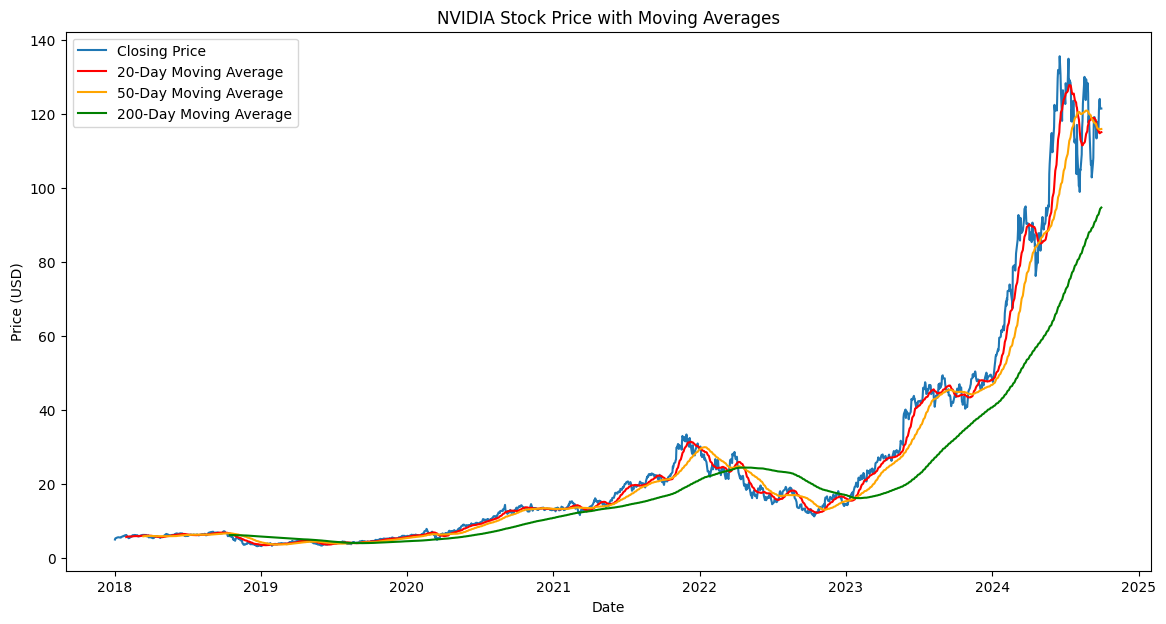

In [84]:
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['20_MA'], label='20-Day Moving Average', color='red')
plt.plot(data['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(data['200_MA'], label='200-Day Moving Average', color='green')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Trend Analysis

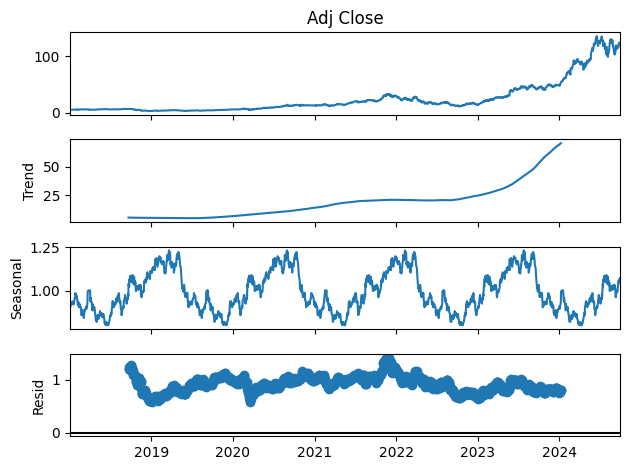

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Adj Close'].dropna(), model='multiplicative', period=365)
result.plot()
plt.show()

# Price prediction using Linear Regression

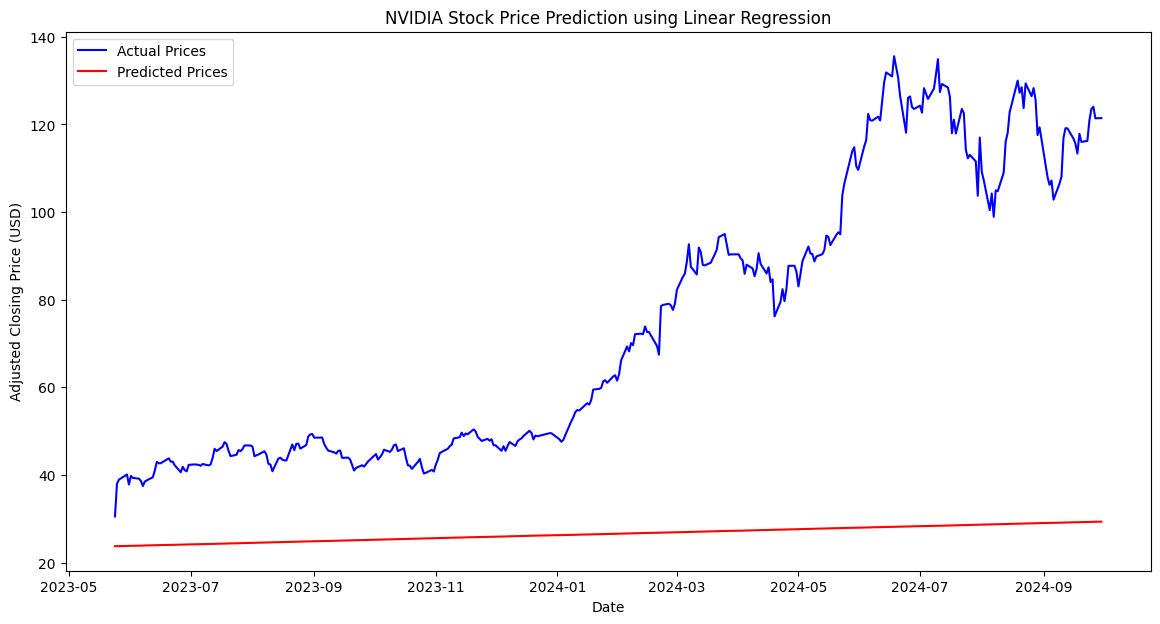

Mean Squared Error: 3152.36118607002


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data['Day'] = np.arange(len(data))
X = data[['Day']]
y = data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('NVIDIA Stock Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

## Fourier Transform for Seasonality

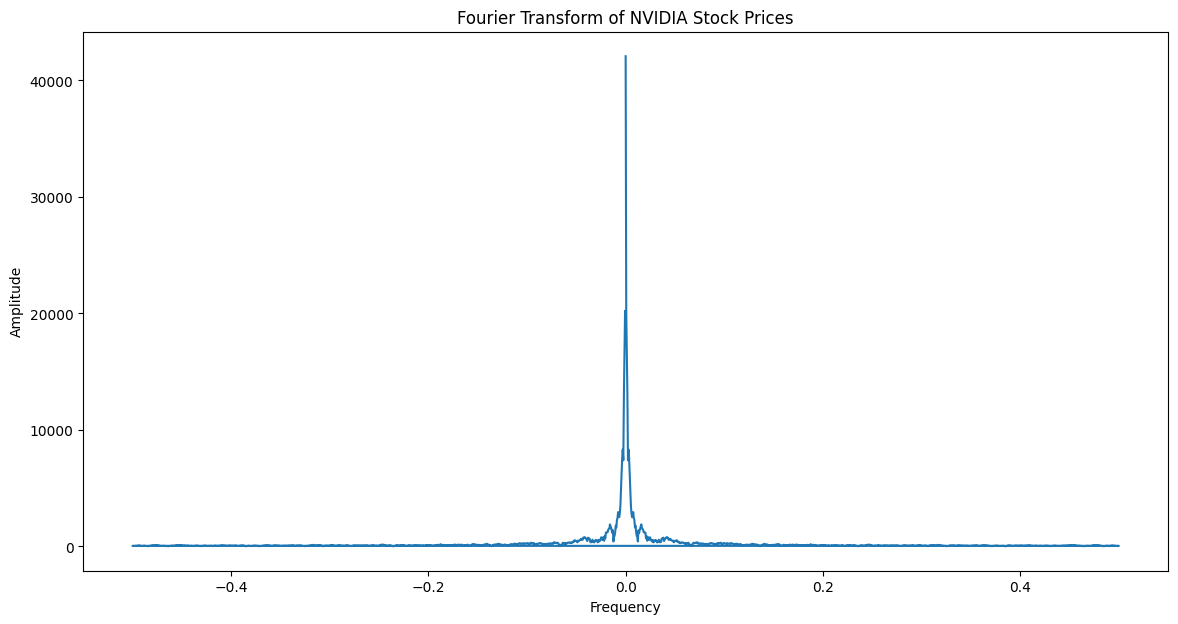

In [91]:
from numpy.fft import fft

fft_values = fft(data['Adj Close'].dropna())
frequencies = np.fft.fftfreq(len(fft_values))

plt.figure(figsize=(14, 7))
plt.plot(frequencies, np.abs(fft_values))
plt.title('Fourier Transform of NVIDIA Stock Prices')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## Autocorrelation and Partial Autocorrelation Analysis

<Figure size 1400x700 with 0 Axes>

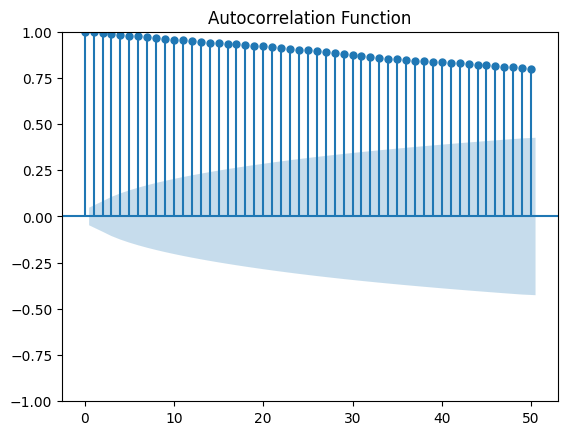

<Figure size 1400x700 with 0 Axes>

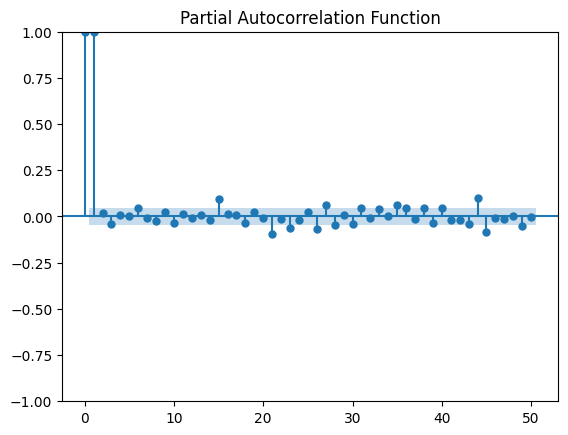

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 7))
plot_acf(data['Adj Close'].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(data['Adj Close'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

# ARIMA Modeling for Time Series Forecasting

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


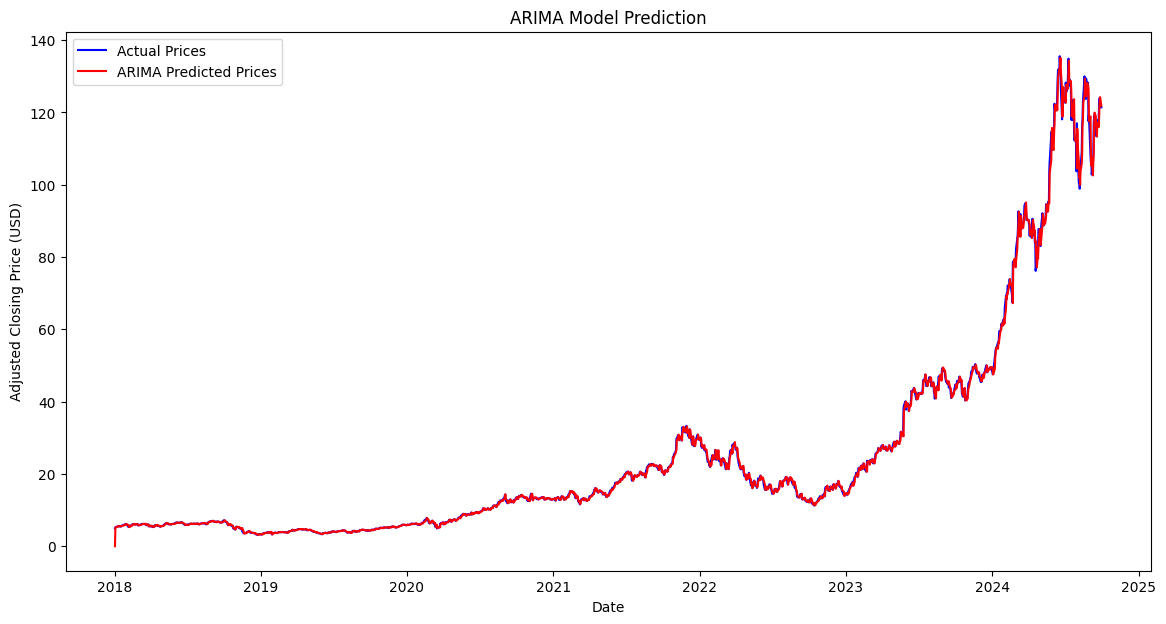

In [93]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(data['Adj Close'].dropna(), order=(5, 1, 0))
arima_result = arima_model.fit()

data['ARIMA_Prediction'] = arima_result.predict(start=0, end=len(data)-1, dynamic=False)

plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Actual Prices', color='blue')
plt.plot(data['ARIMA_Prediction'], label='ARIMA Predicted Prices', color='red')
plt.title('ARIMA Model Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.show()

# Key Insights and Conclusions

**Seasonality and Trends:**

The Fourier Transform analysis reveals significant periodic components in the stock prices, indicating the presence of seasonality.

The seasonal decomposition of time series shows clear trends and seasonal patterns in NVIDIA's stock prices.

**Autocorrelation and Partial Autocorrelation:**

The autocorrelation and partial autocorrelation plots indicate significant lags, suggesting that past prices influence future prices to a certain extent.


**ARIMA Modeling:**

The ARIMA model provides a reasonable fit for predicting future stock prices, as seen from the alignment between actual and predicted prices. However, more complex models might be needed for more accurate predictions.

**Conclusion**
The analysis of NVIDIA's stock data provides valuable insights into the company's market behavior over the years. Key patterns include identifiable trends and seasonality and significant autocorrelations. Predictive models like ARIMA  offers different perspectives on future price movements, each with its strengths and limitations.

For investors and analysts, understanding these patterns can aid in making more informed decisions. The impacts of major events underscore the importance of staying informed about company news and market conditions. Overall, this comprehensive analysis highlights the complex dynamics of stock prices and the utility of various analytical techniques in unraveling these complexities.
